# Decision tree :  Problem of Overfitting


Decision trees are popular in machine learning for their simplicity and ease of interpretation. However, a major drawback is their propensity to overfit the training data, particularly when they are grown without restrictions. To mitigate this issue, methods such as pre-pruning and post-pruning are used to limit the tree's complexity and enhance its ability to generalize to new data.

In [7]:
import pandas as pd
import numpy as np
import re


In [8]:
recipes = pd.read_csv('/content/recipes.csv')
recipes.head()

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
2,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
3,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
4,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


## Preprocessing data

In [9]:
# fix name of the column displaying the cuisine
column_names = recipes.columns.values
column_names[0] = "cuisine"
recipes.columns = column_names

# convert cuisine names to lower case
recipes["cuisine"] = recipes["cuisine"].str.lower()

# make the cuisine names consistent
recipes.loc[recipes["cuisine"] == "austria", "cuisine"] = "austrian"
recipes.loc[recipes["cuisine"] == "belgium", "cuisine"] = "belgian"
recipes.loc[recipes["cuisine"] == "china", "cuisine"] = "chinese"
recipes.loc[recipes["cuisine"] == "canada", "cuisine"] = "canadian"
recipes.loc[recipes["cuisine"] == "netherlands", "cuisine"] = "dutch"
recipes.loc[recipes["cuisine"] == "france", "cuisine"] = "french"
recipes.loc[recipes["cuisine"] == "germany", "cuisine"] = "german"
recipes.loc[recipes["cuisine"] == "india", "cuisine"] = "indian"
recipes.loc[recipes["cuisine"] == "indonesia", "cuisine"] = "indonesian"
recipes.loc[recipes["cuisine"] == "iran", "cuisine"] = "iranian"
recipes.loc[recipes["cuisine"] == "italy", "cuisine"] = "italian"
recipes.loc[recipes["cuisine"] == "japan", "cuisine"] = "japanese"
recipes.loc[recipes["cuisine"] == "israel", "cuisine"] = "jewish"
recipes.loc[recipes["cuisine"] == "korea", "cuisine"] = "korean"
recipes.loc[recipes["cuisine"] == "lebanon", "cuisine"] = "lebanese"
recipes.loc[recipes["cuisine"] == "malaysia", "cuisine"] = "malaysian"
recipes.loc[recipes["cuisine"] == "mexico", "cuisine"] = "mexican"
recipes.loc[recipes["cuisine"] == "pakistan", "cuisine"] = "pakistani"
recipes.loc[recipes["cuisine"] == "philippines", "cuisine"] = "philippine"
recipes.loc[recipes["cuisine"] == "scandinavia", "cuisine"] = "scandinavian"
recipes.loc[recipes["cuisine"] == "spain", "cuisine"] = "spanish_portuguese"
recipes.loc[recipes["cuisine"] == "portugal", "cuisine"] = "spanish_portuguese"
recipes.loc[recipes["cuisine"] == "switzerland", "cuisine"] = "swiss"
recipes.loc[recipes["cuisine"] == "thailand", "cuisine"] = "thai"
recipes.loc[recipes["cuisine"] == "turkey", "cuisine"] = "turkish"
recipes.loc[recipes["cuisine"] == "vietnam", "cuisine"] = "vietnamese"
recipes.loc[recipes["cuisine"] == "uk-and-ireland", "cuisine"] = "uk-and-irish"
recipes.loc[recipes["cuisine"] == "irish", "cuisine"] = "uk-and-irish"


# remove data for cuisines with < 50 recipes:
recipes_counts = recipes["cuisine"].value_counts()
cuisines_indices = recipes_counts > 50

cuisines_to_keep = list(np.array(recipes_counts.index.values)[np.array(cuisines_indices)])
recipes = recipes.loc[recipes["cuisine"].isin(cuisines_to_keep)]

# convert all Yes's to 1's and the No's to 0's
recipes = recipes.replace(to_replace="Yes", value=1)
recipes = recipes.replace(to_replace="No", value=0)

<ipython-input-9-4a842aba65b0>:49: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  recipes = recipes.replace(to_replace="No", value=0)


In [10]:
recipes.head()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
recipes.tail()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
57686,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57687,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57688,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57689,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57690,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Creating Decision Tree

In [12]:
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import itertools

In [13]:
# select subset of cuisines
asian_indian_recipes = recipes[recipes.cuisine.isin(["korean", "japanese", "chinese", "thai", "indian"])]
cuisines = asian_indian_recipes["cuisine"]
ingredients = asian_indian_recipes.iloc[:,1:]

bamboo_tree = tree.DecisionTreeClassifier(max_depth=3)
bamboo_tree.fit(ingredients, cuisines)

print("Decision tree model saved to bamboo_tree!")

Decision tree model saved to bamboo_tree!


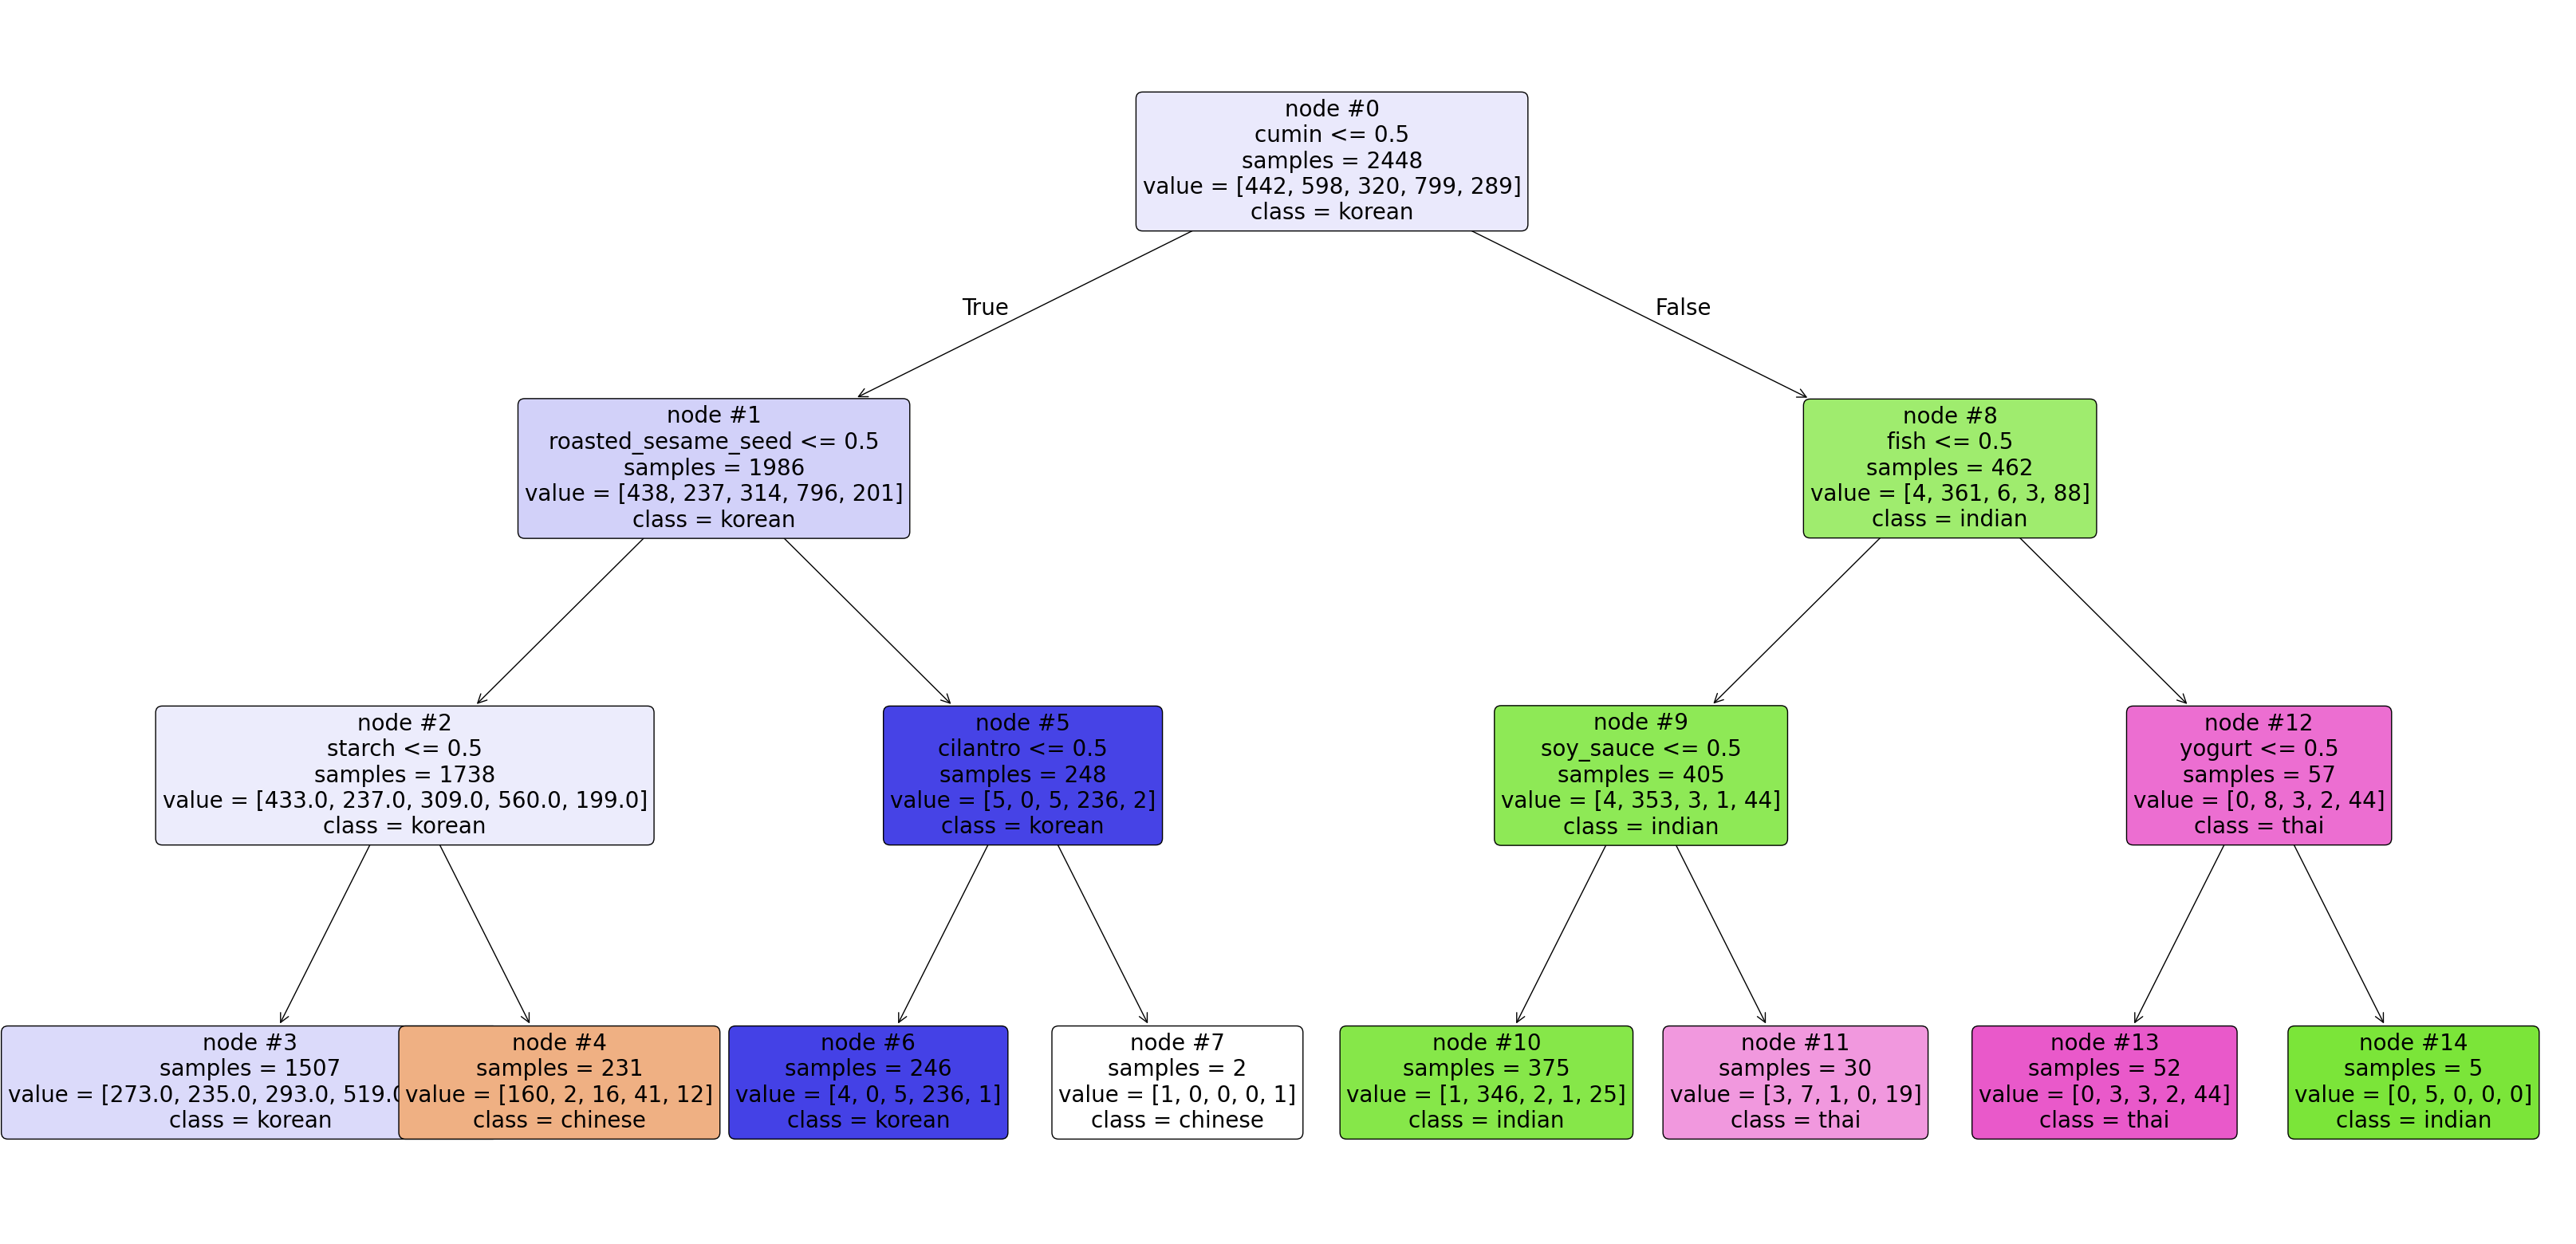

In [14]:
plt.figure(figsize=(40,20))  # customize according to the size of your tree
_ = tree.plot_tree(bamboo_tree,
                   feature_names = list(ingredients.columns.values),
                   class_names=np.unique(cuisines),filled=True,
                   node_ids=True,
                   impurity=False,
                   label="all",
                   fontsize=20, rounded = True)
plt.show()

In [15]:
asian_indian_re = recipes[recipes.cuisine.isin(["korean", "japanese", "chinese", "thai", "indian"])]
cuisines = asian_indian_re["cuisine"]
ingredients = asian_indian_re.iloc[:,1:]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(ingredients,cuisines,test_size = 0.2, random_state = 2)

In [17]:
bamboo = tree.DecisionTreeClassifier()
bamboo.fit(X_train, Y_train)

DecisionTreeClassifier()

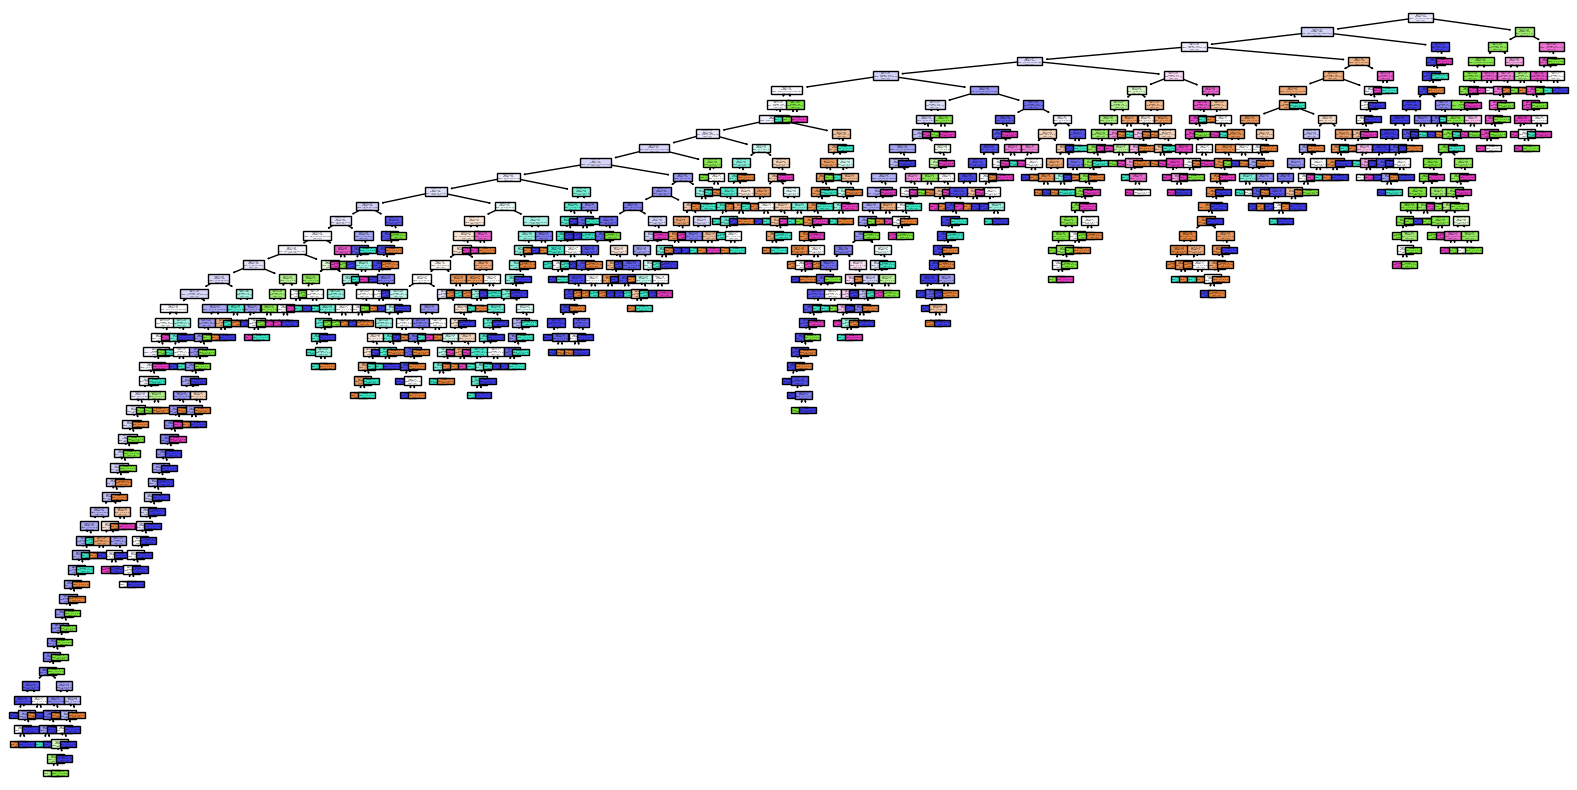

In [29]:
  # customize according to the size of your tree
plt.figure(figsize=(20, 10))
plot_tree(bamboo, filled=True, feature_names=None, class_names=True)
plt.show()


In [18]:
bamboo.score(X_test,Y_test)

0.7040816326530612

In [19]:
bamboo.score(X_train,Y_train)

0.9943820224719101

We observe that the accuracy for the training set is extremely high, while the accuracy for the test set is significantly lower. This indicates a clear case of overfitting.

# Pre-Pruning

Pre-pruning, also referred to as early stopping, involves limiting the growth of a decision tree before it reaches its full size. This method applies specific constraints, such as capping the tree's depth or complexity, to prevent it from expanding further. By doing so, the tree is less likely to capture noise from the training data.

Using pre-pruning with depth of tree as 5

In [20]:
bamboo_pre = tree.DecisionTreeClassifier(max_depth = 5)
bamboo_pre.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5)

In [21]:
bamboo_pre.score(X_train,Y_train)

0.5929519918283963

In [22]:
bamboo_pre.score(X_test,Y_test)

0.5979591836734693

The accuracy for both the training and test sets is very low, which indicates a case of underfitting.

#Post-pruning

Post-pruning, also called cost-complexity pruning, involves fully growing the decision tree, even to the point of overfitting the training data. Afterward, superfluous branches that do not enhance accuracy on unseen data are pruned to improve the tree's generalization.

Initial Test Score (Unpruned Tree): 0.7245
Final Test Score (Pruned Tree): 0.7388
Best Parameters: {'max_depth': 16, 'min_samples_leaf': 19}


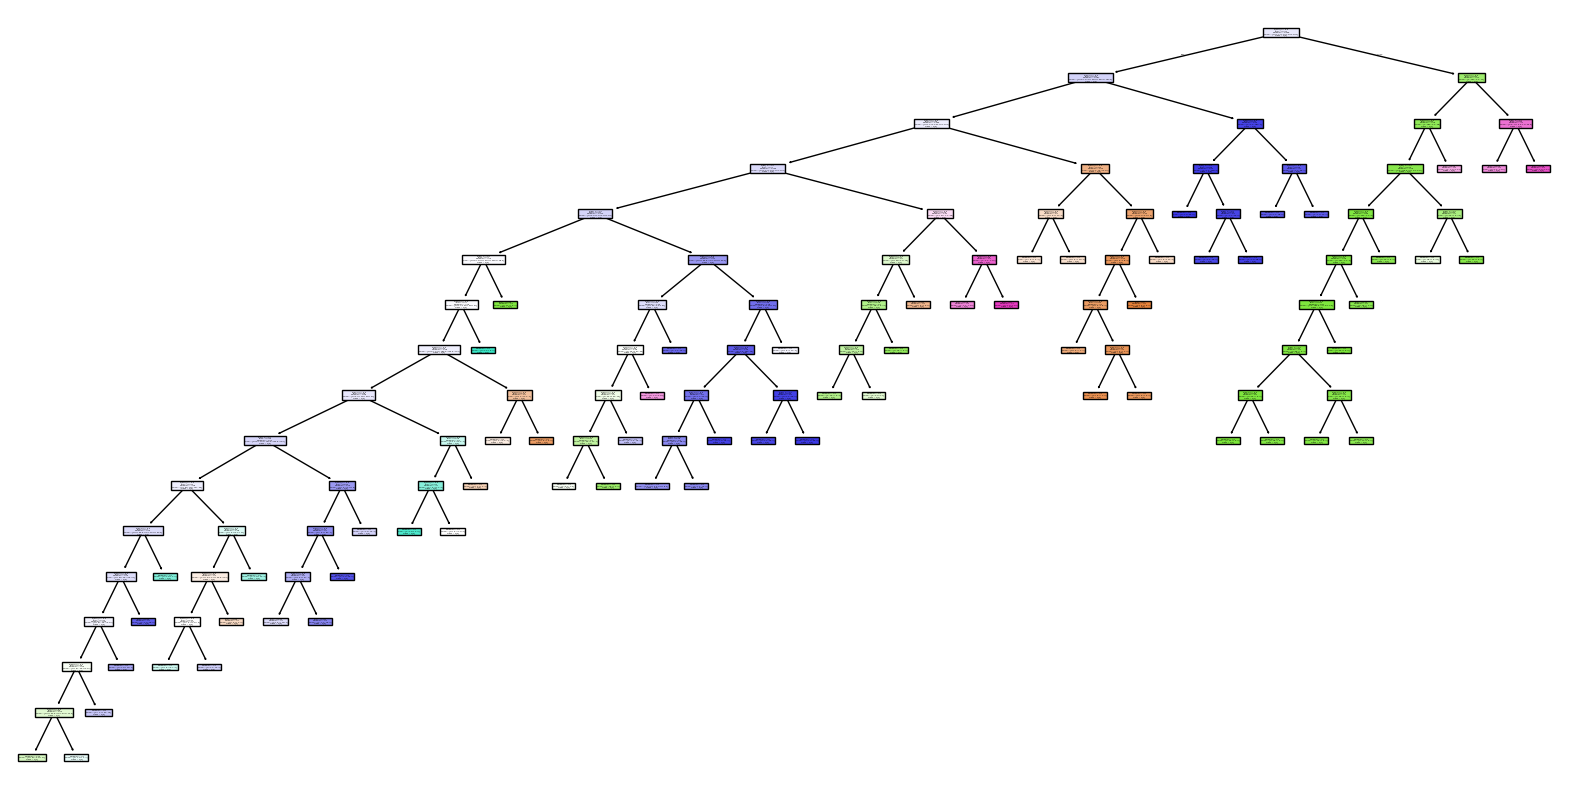

In [26]:
from sklearn.tree import DecisionTreeClassifier
# Step 1: Train the initial Decision Tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, Y_train)

# Evaluate the unpruned tree
initial_score = tree.score(X_test, Y_test)
print(f"Initial Test Score (Unpruned Tree): {initial_score:.4f}")

# Step 2: Post-pruning using a grid search for max_depth and min_samples_leaf
best_score = 0
best_params = {'max_depth': None, 'min_samples_leaf': 1}

# Define ranges for pruning parameters
max_depth_range = range(1, 21)  # Try depths from 1 to 20
min_samples_leaf_range = range(1, 21)  # Try min samples per leaf from 1 to 20

for max_depth in max_depth_range:
    for min_samples_leaf in min_samples_leaf_range:
        # Train a pruned tree
        pruned_tree = DecisionTreeClassifier(
            random_state=42,
            max_depth=max_depth,
            min_samples_leaf=min_samples_leaf
        )
        pruned_tree.fit(X_train, Y_train)

        # Evaluate on the test set
        pruned_score = pruned_tree.score(X_test, Y_test)

        # Update if the pruned tree is better
        if pruned_score > best_score:
            best_score = pruned_score
            best_params = {
                'max_depth': max_depth,
                'min_samples_leaf': min_samples_leaf
            }

# Step 3: Train the best pruned tree
final_tree = DecisionTreeClassifier(
    random_state=42,
    max_depth=best_params['max_depth'],
    min_samples_leaf=best_params['min_samples_leaf']
)
final_tree.fit(X_train, Y_train)

# Evaluate the final pruned tree
final_score = final_tree.score(X_test, Y_test)
print(f"Final Test Score (Pruned Tree): {final_score:.4f}")
print(f"Best Parameters: {best_params}")

# Step 4: Optional Visualization (requires `graphviz` or similar library)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(final_tree, filled=True, feature_names=None, class_names=True)
plt.show()

The final accuracy for test score is : 0.7388